# 4. Analise e Exploração dos Dados


[ml map sklearn](https://scikit-learn.org/stable/tutorial/machine_learning_map/)

In [13]:
# ! pip install seaborn
# ! pip install plotly
# ! pip install statsmodels
# ! pip install sklearn

In [14]:
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import f_classif, f_regression

import joblib

## Carregar dados tratados

In [15]:
def carregar_joblib():
    df = joblib.load("../out/trat_target_col_ibov.joblib")
    return df

### Histograma Comprar e vender col decisao

In [59]:
def print_histograma_comprar_vender(df):
    print("\nHistograma Comprar e Vender\n")
    df = df.copy()
    # Muda os nomes para histograma
    df['decisao'].replace({0: "Vender", 1: "Comprar"}, inplace=True)
    # Imprime a porcentagem de cada
    print(df['decisao'].value_counts(normalize=True).map("{:.1%}".format))

    # Imprime o histograma
    # fig = px.histogram(df, x="decisao", color="decisao")
    # fig.update_layout(bargap=0.2)
    # fig.show()
    hist_sns(df)

def hist_sns(df):
    sns.color_palette("RdBu", 10)
    sns.histplot(data=df, x='decisao', hue='decisao')
    # plt.show()


### Correlacoes

In [17]:
def print_correlacoes(df):

    fig, ax = plt.subplots(figsize=(15, 10))
    sns.heatmap(df.corr(), cmap="Wistia", annot=True, fmt = '.2f', ax=ax)
    plt.show()

## P value

In [19]:
def print_p_value(df):
    all_col = " + ".join(df.drop("decisao", axis=1).columns)
    model = smf.glm(formula="decisao ~ " + all_col, data=df,
                    family = sm.families.Binomial()).fit()

    print(model.summary()) 

## Feature selection

In [55]:
def feat_sel_select_k_best(df):
    print("\nFeature selection select k best\n")

    k = 6  # quantidade de variaveis a serem selecionadas
    
    X = df.drop("decisao", axis=1)
    y = df["decisao"]

    select_percentile = SelectPercentile(score_func=f_regression, percentile=30)

    select = SelectKBest(score_func=f_classif, k=k)

    X_new = select_percentile.fit_transform(X, y)
    print(f"Shape depois da transformacao: {X_new.shape}")
    
    select.fit(X, y)

    filter = select.get_support()
    
    print(f"\n{k} melhores variaveis:")
    print(f"{[col for col in X.columns[filter]]} \n")
    return list(X.columns[filter])


In [47]:
def remover_variaveis_ja_explicadas(df, manter_variaveis):
    to_remove = set(manter_variaveis) ^ set(df.columns)
    to_remove.remove('decisao')
    print("Colunas a remover do df original: ", to_remove)
    df = df.drop(to_remove, axis=1)

    return df

In [23]:
def salvar_df_in_joblib(df, file_name: str = "../out/result_analise_desc.joblib"):

    joblib.dump(df, file_name)

    print("arquivo joblib de df analise descritiva criado com sucesso")


# Execucao

Feature Selection notebook


Carregado df com 1852 linhas e 21 colunas.

Colunas carregadas: ['ativo_total', 'ativo_circ', 'caixa_equiv_caixa', 'outros_ativos_circ', 'ativo_permanente', 'outros_ativos_nao_circ', 'imobilizado', 'intangivel', 'passivo_total', 'passivo_circ', 'passivo_nao_circ', 'patrimonio_liq', 'capital_social', 'receita_liq', 'custo_bens_servicos', 'resultado_bruto', 'despesas_gerais', 'financeiras', 'resultado_antes_trib', 'lucro_op', 'decisao']



Histograma Comprar e Vender

Comprar    50.2%
Vender     49.8%
Name: decisao, dtype: object


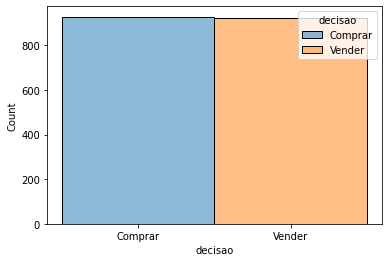

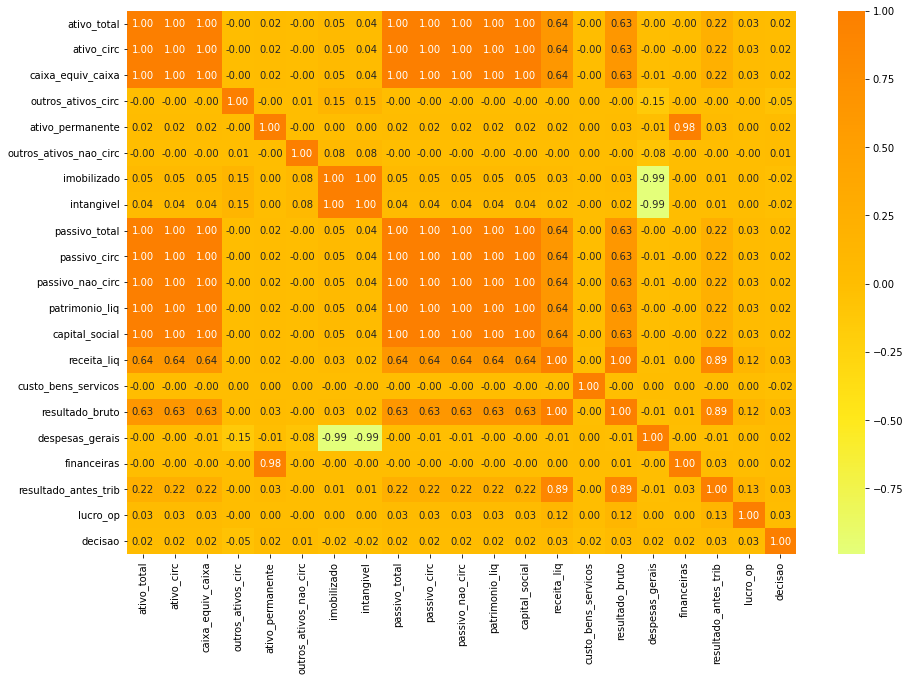

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

Feature selection select k best

Shape depois da transformacao: (1852, 6)

6 melhores variaveis:
['outros_ativos_circ', 'receita_liq', 'resultado_bruto', 'despesas_gerais', 'resultado_antes_trib', 'lucro_op'] 

Colunas a remover do df original:  {'caixa_equiv_caixa', 'capital_social', 'patrimonio_liq', 'passivo_circ', 'passivo_nao_circ', 'passivo_total', 'outros_ativos_nao_circ', 'ativo_permanente', 'ativo_total', 'intangivel', 'financeiras', 'ativo_circ', 'custo_bens_servicos', 'imobilizado'}

Correlacoes apos remover colunas



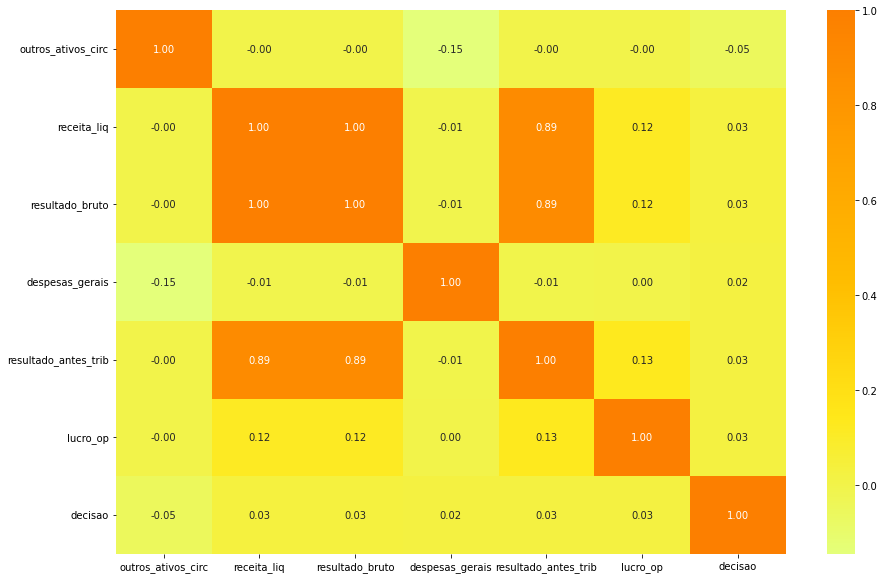

Remover coluna resultado_bruto por ter correlacao com receita_liq
Colunas a remover do df original:  {'resultado_bruto'}

Correlacoes apos remover colunas



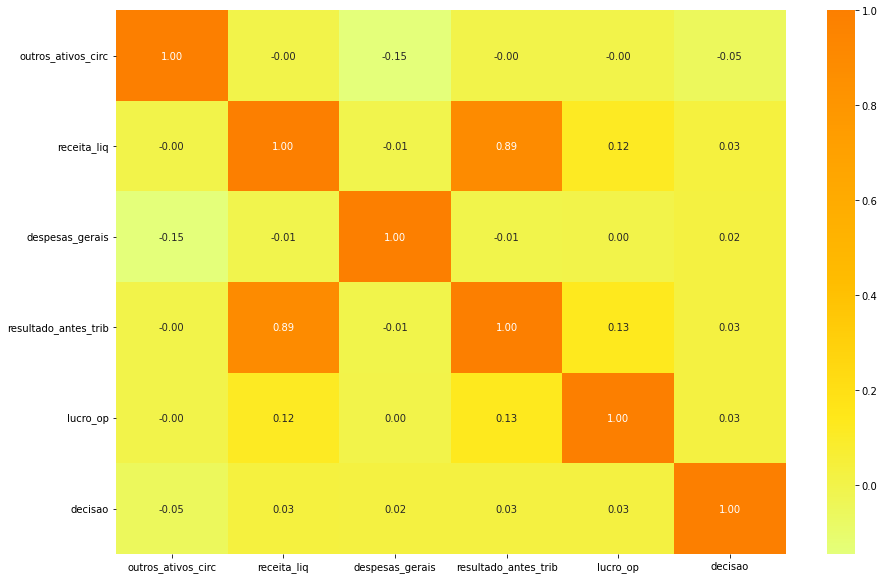

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-
                 Generalized Linear Model Regression Results                  
Dep. Variable:                decisao   No. Observations:                 1852
Model:                            GLM   Df Residuals:                     1846
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1267.9
Date:                Sun, 23 Jan 2022   Deviance:                       2535.8
Time:                        11:02:27   Pearson chi2:                 1.87e+03
No. Iterations:                    15   Pseudo R-squ. (CS):            0.01691
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------

In [60]:
def main():
    print("Analise e feature selection notebook\n\n")

    df = carregar_joblib()

    print(f"Carregado df com {df.shape[0]} linhas e {df.shape[1]} colunas.\n")
    print(f"Colunas carregadas: {[col for col in df.columns]}\n\n")

    print_histograma_comprar_vender(df)

    print_correlacoes(df)

    print("#-" * 40)
    best_features = feat_sel_select_k_best(df)
    
    df = remover_variaveis_ja_explicadas(df, manter_variaveis=best_features)

    print("\nCorrelacoes apos remover colunas\n")

    print_correlacoes(df)

    print("Remover coluna resultado_bruto por ter correlacao com receita_liq")

    df = remover_variaveis_ja_explicadas(df, manter_variaveis=['outros_ativos_circ', 'receita_liq', 'despesas_gerais', 'resultado_antes_trib', 'lucro_op'])

    print("\nCorrelacoes apos remover colunas\n")

    print_correlacoes(df)

    print("#-" * 40)

    print_p_value(df)

    salvar_df_in_joblib(df, "../out/result_analise_desc.joblib")

    return df

    
df = main()

Feature Selection notebook


Carregado df com 1852 linhas e 21 colunas.

Colunas carregadas: ['ativo_total', 'ativo_circ', 'caixa_equiv_caixa', 'outros_ativos_circ', 'ativo_permanente', 'outros_ativos_nao_circ', 'imobilizado', 'intangivel', 'passivo_total', 'passivo_circ', 'passivo_nao_circ', 'patrimonio_liq', 'capital_social', 'receita_liq', 'custo_bens_servicos', 'resultado_bruto', 'despesas_gerais', 'financeiras', 'resultado_antes_trib', 'lucro_op', 'decisao']


#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-

Feature selection select k best

Shape depois da transformacao: (1852, 7)

5 melhores variaveis:
['outros_ativos_circ', 'receita_liq', 'resultado_bruto', 'despesas_gerais', 'resultado_antes_trib', 'lucro_op'] 

Colunas a remover do df original:  {'caixa_equiv_caixa', 'capital_social', 'patrimonio_liq', 'passivo_circ', 'passivo_nao_circ', 'passivo_total', 'outros_ativos_nao_circ', 'ativo_permanente', 'ativo_total', 'intangivel', 'financeiras', '

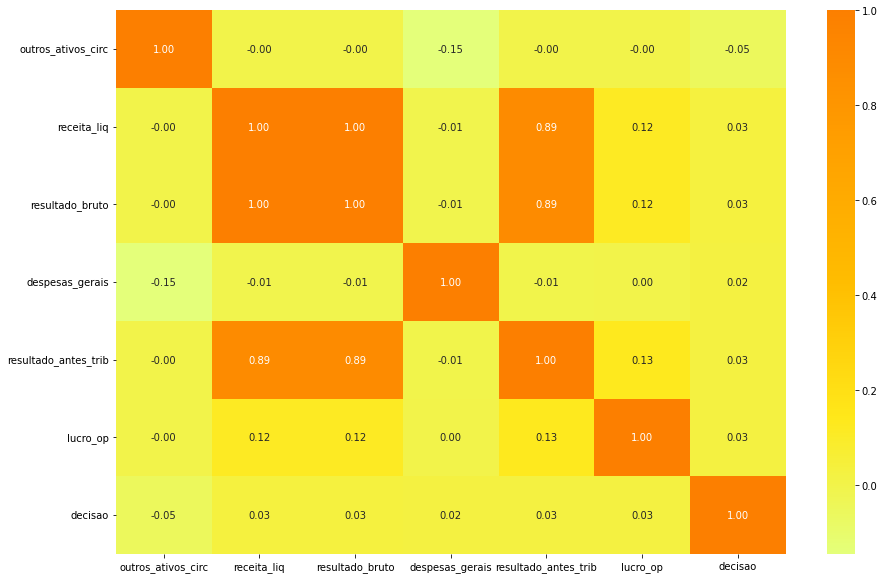

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-


In [45]:
df = main()